# Sistem rekomendasi buku

## Data Understanding

Untuk dapat membangun sistem rekomendasi buku, kita memerlukan dataset terlebih dahulu. Kali ini, kita mengambil data dari [Kaggle](https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset). 

In [1]:
import pandas as pd
import numpy as np

books = pd.read_csv('data/BX_Books.csv', sep=';', encoding='latin-1')
ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=';', encoding='latin-1')
users = pd.read_csv('data/BX-Users.csv', sep=';', encoding='latin-1')

**Insight** : Dataset yang kita miliki terdiri dari 3 file, yaitu:
- BX_Books.csv : Berisi informasi seputar buku yang tersedia pada dataset
- BX-Book-Ratings.csv : Berisi informasi seputar rating yang dilakukan user terhadap suatu buku
- BX-Users.csv : Berisi informasi seputar user yang tersedia pada dataset

Informasi mengenai datasetnya sendiri yaitu terdiri dari 278,858 users anonim tetapi dengan informasi demografi yang menyediakan 1,149,780 ratings (explicit / implicit) tentang 271,379 books.

In [2]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271375,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


**Insight** : Pada books dataframe terdapat beberapa kolom seputar identitas buku.
- ISBN : International Standard Book Number
- Book-Title : Judul buku
- Book-Author : Penulis buku
- Year-Of-Publication : Tahun terbit
- Publisher : Penerbit
- Image-URL-S : Link gambar berukuran kecil
- Image-URL-M : Link gambar berukuran sedang
- Image-URL-L : Link gambar berukuran besar

In [3]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


**Insight** : Pada ratings dataframe terdapat kolom tentang rating yang dilakukan user pada suatu buku.
- User-ID : ID user/pembaca
- ISBN : International Standard Book Number
- Book-Rating : Skor yang diberikan pengguna

In [4]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


**Insight** : Pada user dataframe terdapat informasi user yang melakukan rating.
- User-ID : ID user/pembaca
- Location : Lokasi user
- Age : Usia user

In [5]:
print('Jumlah buku:', len(books.ISBN.unique()))
print('Jumlah rating:', ratings.shape[0] - ratings.duplicated(subset=['User-ID', 'ISBN']).sum())
print('Jumlah user:', len(users['User-ID'].unique()))

Jumlah buku: 271379
Jumlah rating: 1149780
Jumlah user: 278858


**Insight** : Data yang terdapat pada dataset ini sangat besar. Dataset mencakup 271.379 buku, 1.1497.780 rating, dan 278.858 user.

### Analisis Duplikasi Data

In [6]:
print('Jumlah buku duplikat:', books.duplicated().sum())
print('Jumlah rating duplikat:', ratings.duplicated(subset=['User-ID', 'ISBN']).sum())
print('Jumlah user duplikat:', users.duplicated().sum())

Jumlah buku duplikat: 0
Jumlah rating duplikat: 0
Jumlah user duplikat: 0


**Insight** : Dari jumlah data yang sangat besar, tidak ditemukan adanya duplikasi data.

### Analisis Missing Value

In [7]:
print('Missing values pada buku:')
print(books.isnull().sum())
print()
print('Missing values pada rating:')
print(ratings.isnull().sum())
print()
print('Missing values pada user:')
print(users.isnull().sum())

Missing values pada buku:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

Missing values pada rating:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Missing values pada user:
User-ID          0
Location         0
Age         110762
dtype: int64


**Insight** : Terdapat missing value pada books df dan users df.

### Univariate Exploratory Data Analysis

- books = buku yang tersedia pada dataset
- ratings = penilaian buku oleh user
- users = data user

#### Books Variable

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271377 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-URL-S          271379 non-null  object
 6   Image-URL-M          271379 non-null  object
 7   Image-URL-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [9]:
print('Banyak data:', len(books.ISBN.unique()))
print('Judul buku yang tersedia:', books['Book-Title'].unique())

Banyak data: 271379
Judul buku yang tersedia: ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]


**Insight** : Dataframe subset_books terdiri dari 7 data kategorikal dan 1 data numerik.

#### Ratings Variable

In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
print('Banyak data:', ratings.shape[0] - ratings.duplicated(subset=['User-ID', 'ISBN']).sum())
print('Nilai rating yang ada pada dataset:', np.sort(ratings['Book-Rating'].unique()))
print('Banyak user yang memberikan rating:', len(ratings['User-ID'].unique()))

Banyak data: 1149780
Nilai rating yang ada pada dataset: [ 0  1  2  3  4  5  6  7  8  9 10]
Banyak user yang memberikan rating: 105283


**Insight** : Dataframe subset_ratings terdiri dari 2 data numerik dan 1 data kategorikal. Rating berada pada range 0 hingga 10.

In [12]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


**Insight** : Data pada User-ID dan Book rating memiliki jumlah yang sama yaitu 1149780. Dapat dilihat bahwa nilai Book-Rating sebagian besar merupakan nilai 0 karena data minimal hingga mediannya bernilai 0.

#### Users Variable

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [14]:
print('Banyak data:', len(users['User-ID'].unique()))
print('User yang ada pada dataset:', users['User-ID'].unique())

Banyak data: 278858
User yang ada pada dataset: [     1      2      3 ... 278856 278857 278858]


**Insight** : Dataframe subset_users memiliki 2 data numerik dan 1 data kategorikal dengan jumlah 278.858 data.

### Exploratory Data Analysis

#### Top 20 Books

In [15]:
Unique_title = pd.unique(books['Book-Title'].values.ravel())
print("Number of Unique values: ",books['Book-Title'].nunique())
Value_Unique_title = books['Book-Title'].value_counts()
Value_Unique_title.head(50)

Number of Unique values:  242154


Book-Title
Selected Poems                                                     27
Little Women                                                       24
Wuthering Heights                                                  21
The Secret Garden                                                  20
Dracula                                                            20
Adventures of Huckleberry Finn                                     20
Jane Eyre                                                          19
The Night Before Christmas                                         18
Pride and Prejudice                                                18
Great Expectations                                                 17
Masquerade                                                         16
Frankenstein                                                       16
Black Beauty                                                       16
The Gift                                                           15
Beloved  

**Insight** : Dari data buku dalam dataframe, terdapat 242.154 judul buku yang unik. Namun, itu bukan berarti ada duplikasi data, karena data dengan judul tersebut dapat memiliki Author, Tahun terbit, hingga Penerbit yang berbeda.

Text(0.5, 1.0, 'Top 20 Books - Count')

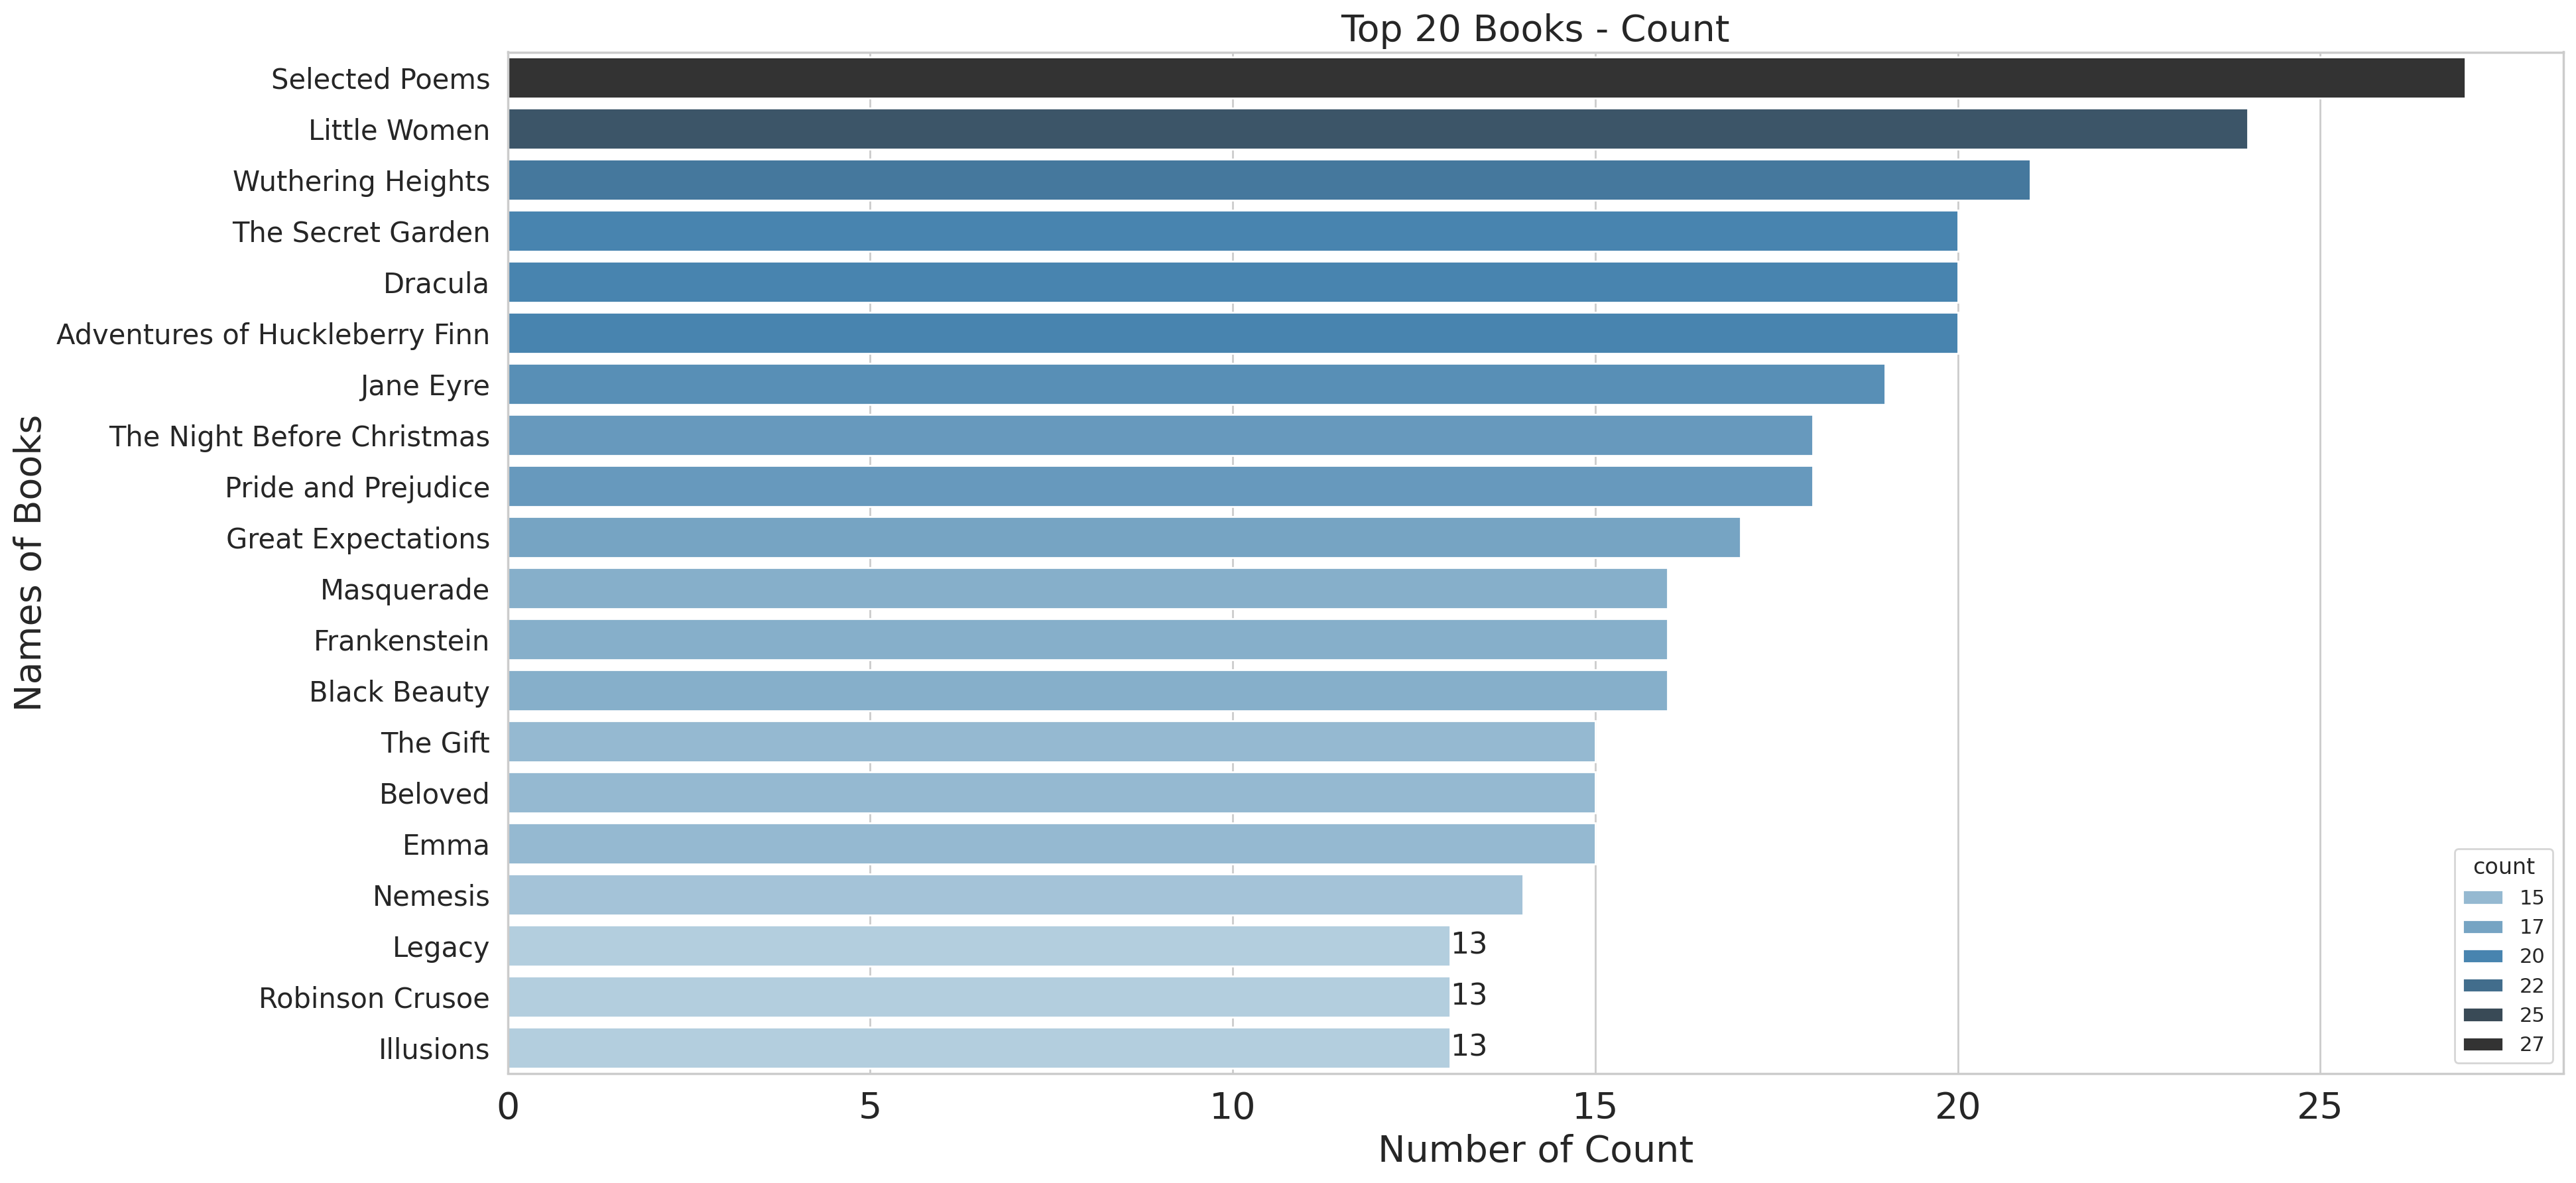

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_books = books['Book-Title'].value_counts()[:20]
ax = sns.barplot(x= Top_20_books, y= Top_20_books.index, palette="Blues_d", hue=Top_20_books)
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Books", fontsize=20)
plt.xlabel("Number of Count", fontsize=20)
plt.title("Top 20 Books - Count", fontsize= 20)

**Insight** : Judul buku "Selected Poems" memiliki jumlah terbanyak yaitu 27 buku.

#### Top 20 Authors

In [17]:
Unique_author = pd.unique(books['Book-Author'].values.ravel())
print("Number of Unique values: ",books['Book-Author'].nunique())
Value_Unique_author = books['Book-Author'].value_counts()
Value_Unique_author.head(50)

Number of Unique values:  102027


Book-Author
Agatha Christie          632
William Shakespeare      567
Stephen King             524
Ann M. Martin            423
Francine Pascal          373
Carolyn Keene            373
Isaac Asimov             330
Nora Roberts             315
Barbara Cartland         307
Charles Dickens          302
Not Applicable (Na )     286
R. L. Stine              282
Mark Twain               231
Jane Austen              223
Terry Pratchett          220
Mary Higgins Clark       218
Piers Anthony            217
Marion Zimmer Bradley    216
Janet Dailey             214
Franklin W. Dixon        204
Roald Dahl               195
Tom Clancy               174
J. R. R. Tolkien         174
Dick Francis             174
Danielle Steel           173
John Steinbeck           172
Anne McCaffrey           172
Fern Michaels            165
Nathaniel Hawthorne      165
Enid Blyton              164
Diana Palmer             164
Don Pendleton            162
Ed McBain                151
Andre Norton             146
L.

**Insight** : Dari data author yang dimiliki, ada sebanyak 102.027 data Author unik. Agatha Christie memiliki data terbanyak yaitu sebanyak 632 buku.

Text(0.5, 1.0, 'Top 20 Author - Count')

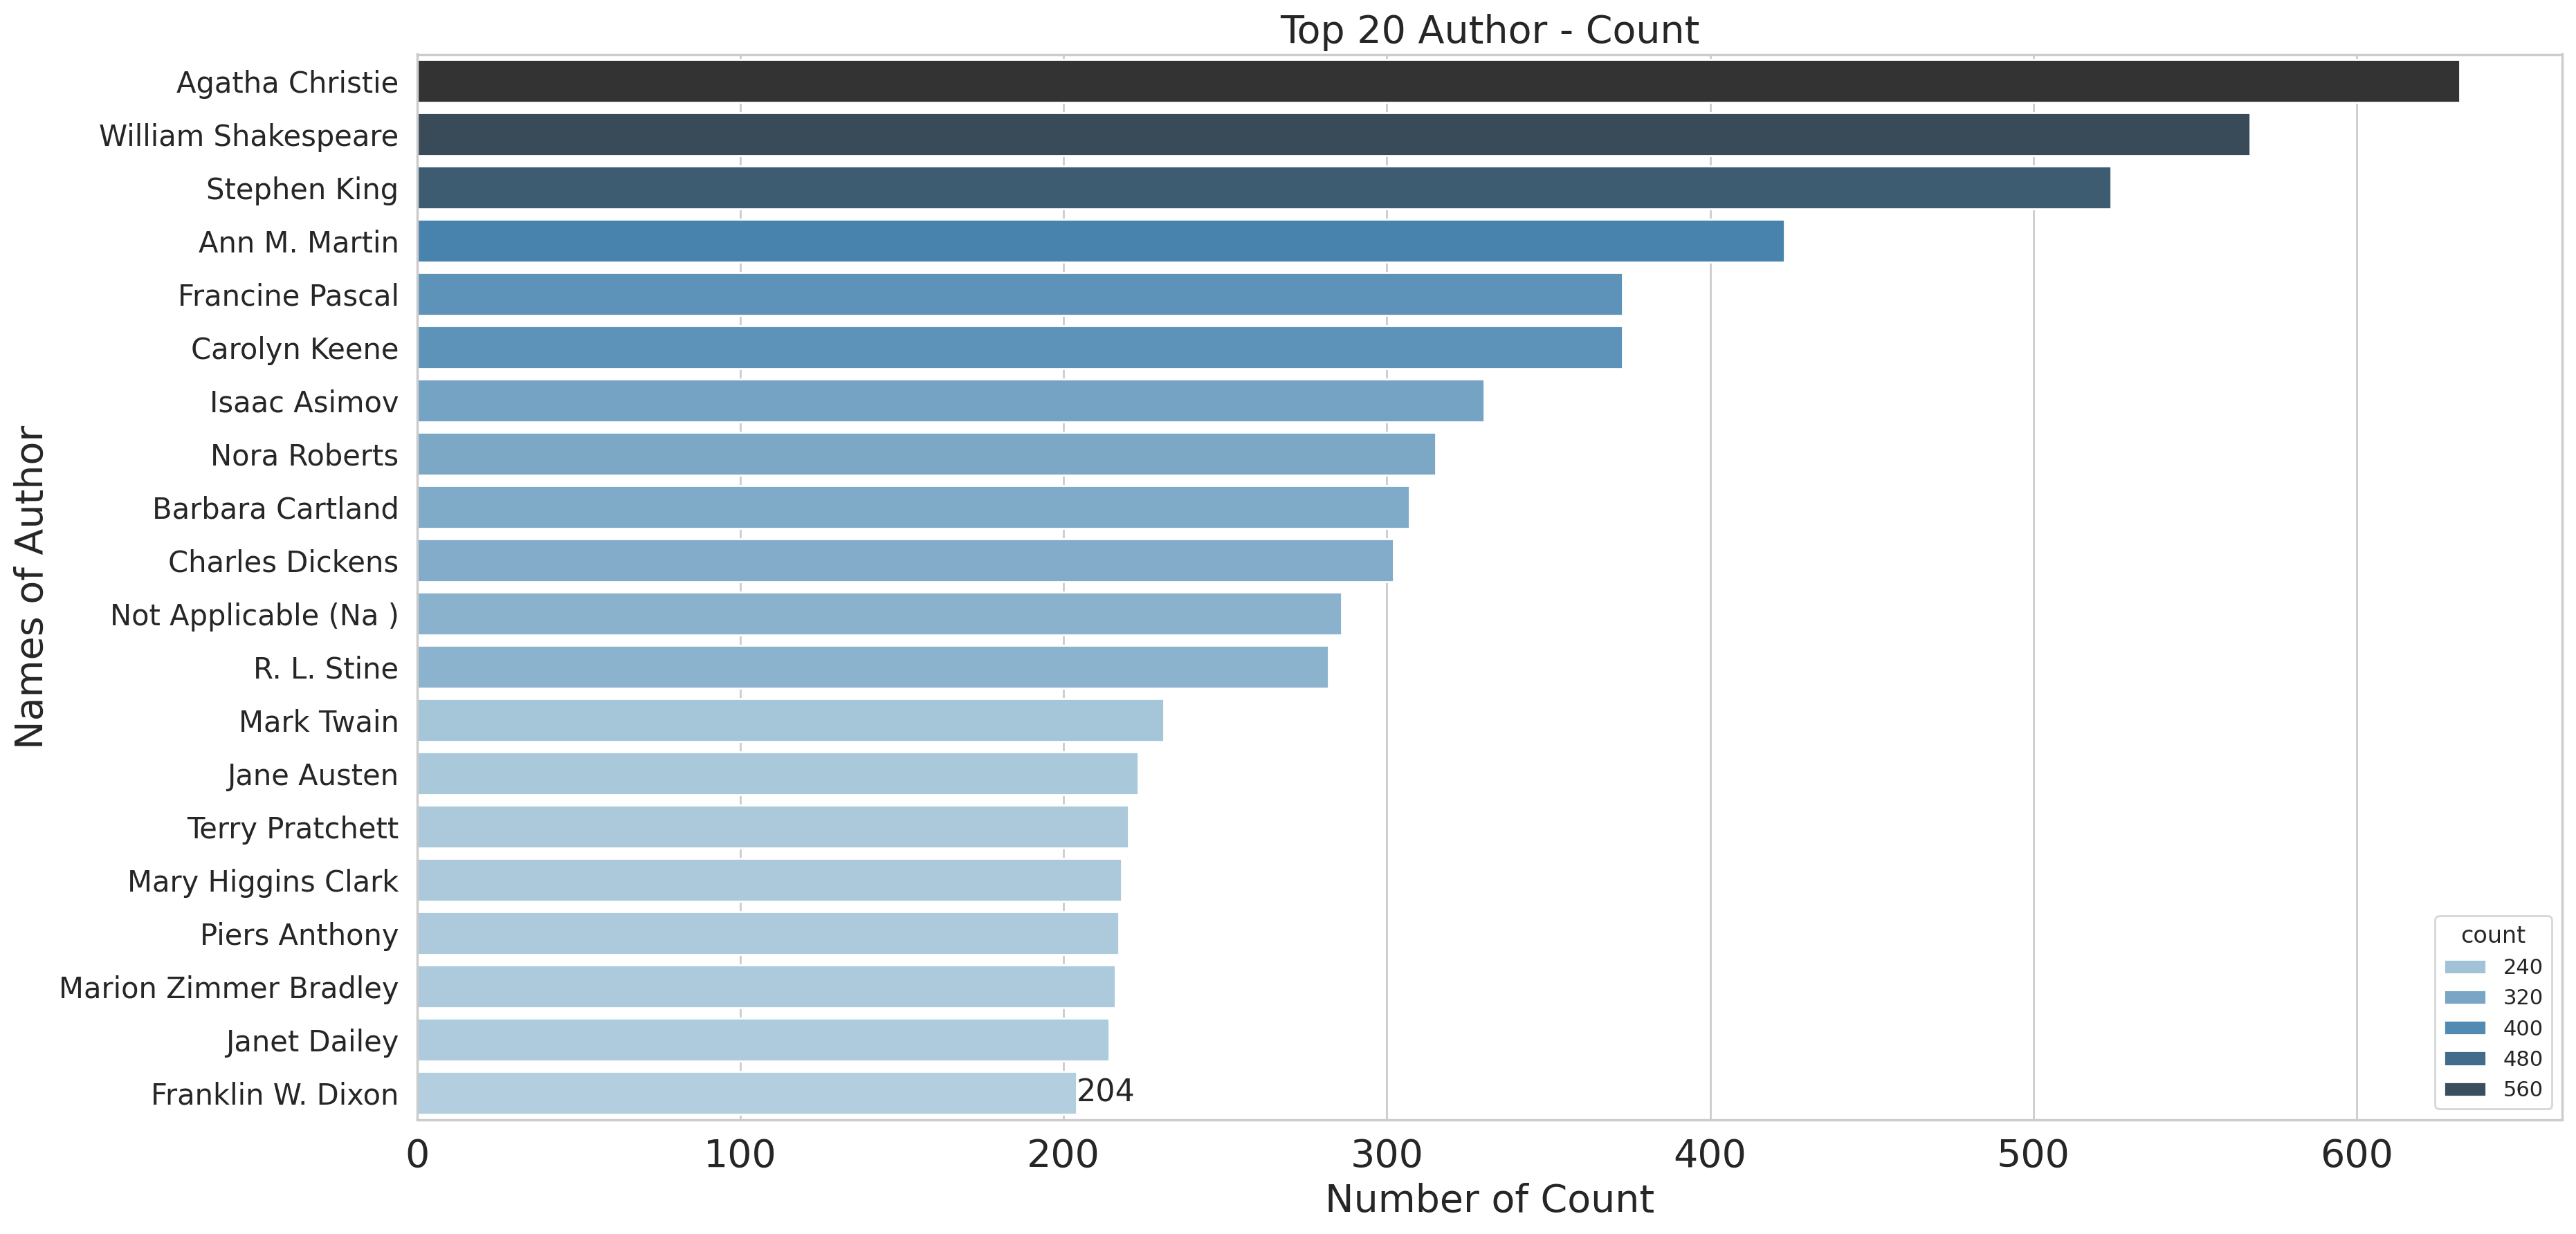

In [18]:
sns.set_theme(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_author = books['Book-Author'].value_counts()[:20]
ax = sns.barplot(x= Top_20_author, y= Top_20_author.index, palette="Blues_d", hue=Top_20_author)
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Author", fontsize=20)
plt.xlabel("Number of Count", fontsize=20)
plt.title("Top 20 Author - Count", fontsize= 20)

In [19]:
books.loc[books['Book-Author'] == 'Agatha Christie']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1855,0451200993,Sleeping Murder (Miss Marple Mysteries (Paperb...,Agatha Christie,2000,New American Library,http://images.amazon.com/images/P/0451200993.0...,http://images.amazon.com/images/P/0451200993.0...,http://images.amazon.com/images/P/0451200993.0...
2012,0671555235,A Caribbean Mystery,Agatha Christie,1984,Pocket,http://images.amazon.com/images/P/0671555235.0...,http://images.amazon.com/images/P/0671555235.0...,http://images.amazon.com/images/P/0671555235.0...
2355,0425173755,Murder on the Orient Express (Hercule Poirot M...,Agatha Christie,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425173755.0...,http://images.amazon.com/images/P/0425173755.0...,http://images.amazon.com/images/P/0425173755.0...
2356,0451199871,The Body in the Library (Miss Marple Mysteries...,Agatha Christie,2000,Signet Book,http://images.amazon.com/images/P/0451199871.0...,http://images.amazon.com/images/P/0451199871.0...,http://images.amazon.com/images/P/0451199871.0...
2569,067170463X,Murder on the Orient Express,Agatha Christie,1978,Pocket Books,http://images.amazon.com/images/P/067170463X.0...,http://images.amazon.com/images/P/067170463X.0...,http://images.amazon.com/images/P/067170463X.0...
...,...,...,...,...,...,...,...,...
270338,2702400787,Le couteau sur la nuque,Agatha Christie,1979,Librairie des Champs-ElysÃ?Â©es,http://images.amazon.com/images/P/2702400787.0...,http://images.amazon.com/images/P/2702400787.0...,http://images.amazon.com/images/P/2702400787.0...
270538,0671494538,ENDLESS NIGHT,Agatha Christie,1983,Pocket,http://images.amazon.com/images/P/0671494538.0...,http://images.amazon.com/images/P/0671494538.0...,http://images.amazon.com/images/P/0671494538.0...
271113,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271114,8427285280,Poirot en Egipto,Agatha Christie,1996,Downtown Book Center,http://images.amazon.com/images/P/8427285280.0...,http://images.amazon.com/images/P/8427285280.0...,http://images.amazon.com/images/P/8427285280.0...


**Insight** : Agatha Christie merupakan Author dengan karya terbanyak dalam dataset ini.

#### Top 20 Publisher

In [20]:
Unique_publisher = pd.unique(books['Publisher'].values.ravel())
print("Number of Unique values: ",books['Publisher'].nunique())
Value_Unique_publisher = books['Publisher'].value_counts()
Value_Unique_publisher.head(50)

Number of Unique values:  16806


Publisher
Harlequin                             7536
Silhouette                            4220
Pocket                                3905
Ballantine Books                      3783
Bantam Books                          3647
Scholastic                            3160
Simon & Schuster                      2971
Penguin Books                         2844
Berkley Publishing Group              2771
Warner Books                          2727
Penguin USA                           2717
Harpercollins                         2526
Fawcett Books                         2258
Signet Book                           2070
Random House Inc                      2045
St Martins Pr                         1953
St. Martin's Press                    1783
Tor Books                             1704
HarperCollins Publishers              1701
Zebra Books                           1694
Bantam                                1660
Avon                                  1566
Jove Books                            1553
V

**Insight** : Dari data publisher yang dimiliki, ada sebanyak 16.806 data unik dari publisher.

Text(0.5, 1.0, 'Top 20 Publisher - Count')

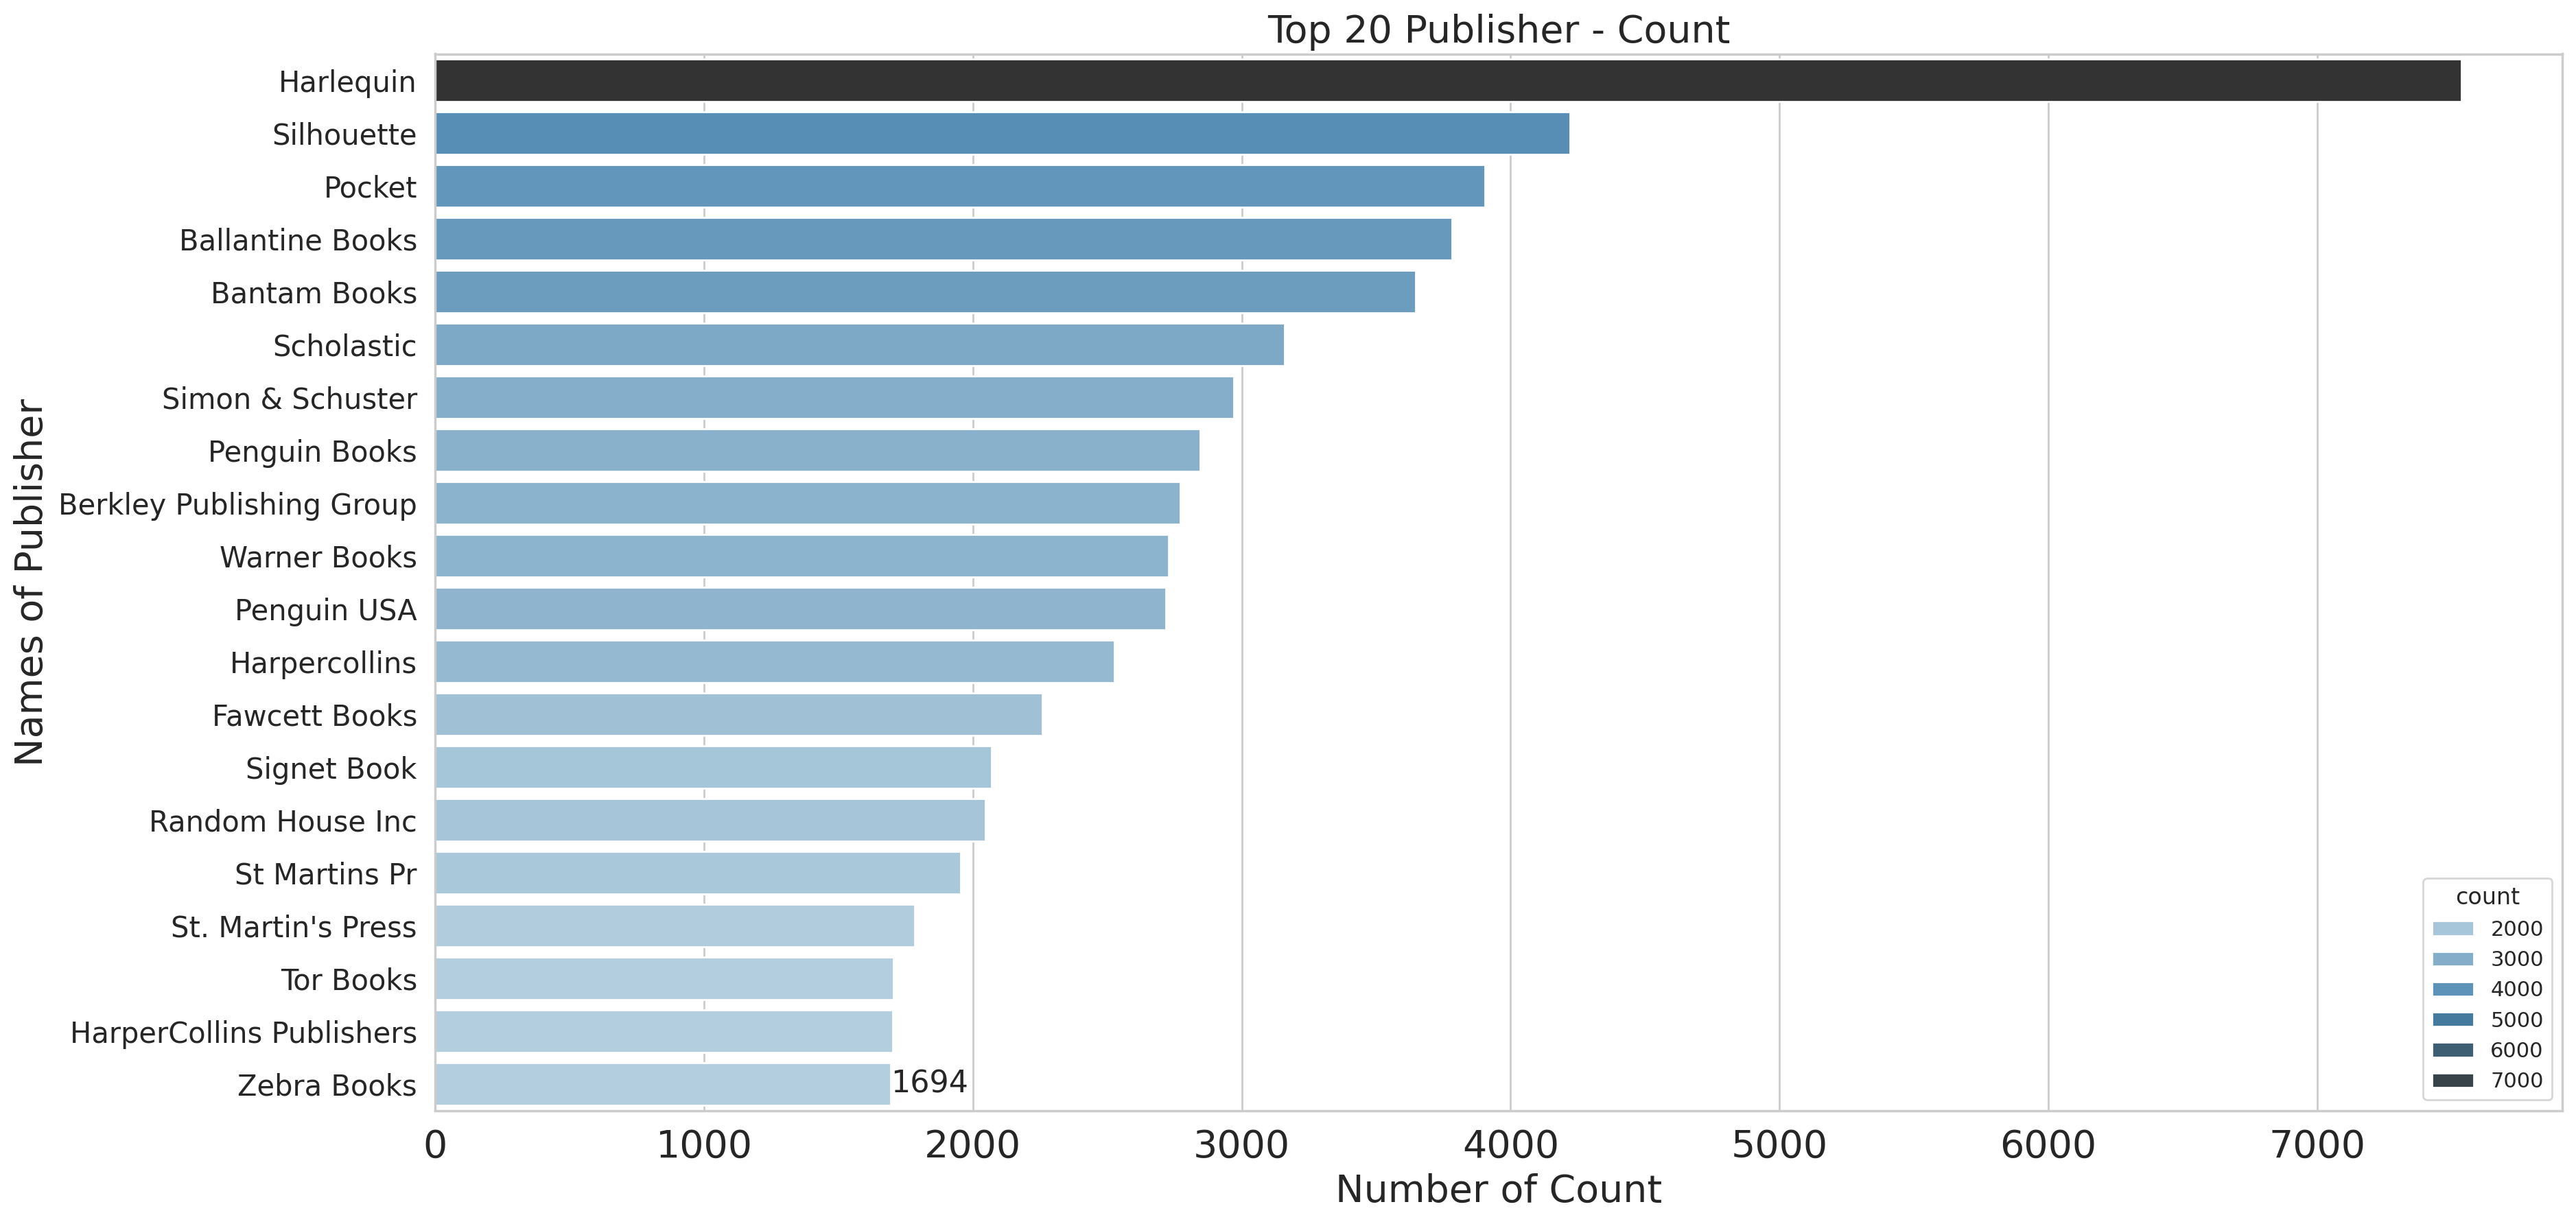

In [21]:
sns.set_theme(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_publisher = books['Publisher'].value_counts()[:20]
ax = sns.barplot(x= Top_20_publisher, y= Top_20_publisher.index, palette="Blues_d", hue=Top_20_publisher)
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Publisher", fontsize=20)
plt.xlabel("Number of Count", fontsize=20)
plt.title("Top 20 Publisher - Count", fontsize= 20)

In [22]:
books.loc[books['Publisher'] == 'Harlequin']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
269,0373836023,Powder and Patch,Georgette Heyer,2004,Harlequin,http://images.amazon.com/images/P/0373836023.0...,http://images.amazon.com/images/P/0373836023.0...,http://images.amazon.com/images/P/0373836023.0...
999,0373037430,Rush to the Altar (Twin Brides),Rebecca Winters,2003,Harlequin,http://images.amazon.com/images/P/0373037430.0...,http://images.amazon.com/images/P/0373037430.0...,http://images.amazon.com/images/P/0373037430.0...
1002,0373750013,The Virgin's Secret Marriage The Brides Of H...,Cathy Gillen Thacker,2003,Harlequin,http://images.amazon.com/images/P/0373750013.0...,http://images.amazon.com/images/P/0373750013.0...,http://images.amazon.com/images/P/0373750013.0...
1013,0373123485,On The Tycoon's Terms Do Not Disturb! (Harle...,Sandra Field,2003,Harlequin,http://images.amazon.com/images/P/0373123485.0...,http://images.amazon.com/images/P/0373123485.0...,http://images.amazon.com/images/P/0373123485.0...
1014,0373123108,Sleeping Partners (Nine to Five),Helen Brooks,2003,Harlequin,http://images.amazon.com/images/P/0373123108.0...,http://images.amazon.com/images/P/0373123108.0...,http://images.amazon.com/images/P/0373123108.0...
...,...,...,...,...,...,...,...,...
270943,0373704208,"Heart Of The West (Harlequin Superromance, No ...",Nancy Ellison,1990,Harlequin,http://images.amazon.com/images/P/0373704208.0...,http://images.amazon.com/images/P/0373704208.0...,http://images.amazon.com/images/P/0373704208.0...
270988,037301760X,The Guarded Gates,Katrina Britt,1974,Harlequin,http://images.amazon.com/images/P/037301760X.0...,http://images.amazon.com/images/P/037301760X.0...,http://images.amazon.com/images/P/037301760X.0...
271054,0373168128,"Mommy Makeover (Harlequin American Romance, 812)",Bonnie K. Winn,2000,Harlequin,http://images.amazon.com/images/P/0373168128.0...,http://images.amazon.com/images/P/0373168128.0...,http://images.amazon.com/images/P/0373168128.0...
271055,0373168306,The Rancher's Mail Order Bride (Harlequin Amer...,James Neff,2000,Harlequin,http://images.amazon.com/images/P/0373168306.0...,http://images.amazon.com/images/P/0373168306.0...,http://images.amazon.com/images/P/0373168306.0...


**Insight** : Harlequin merupakan penerbit dengan terbitan terbanyak, yaitu sebanyak 7.536 data.

#### Top 20 User

In [23]:
top_users = ratings['User-ID'].value_counts()

top_users

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
119573        1
276706        1
276697        1
276679        1
276676        1
Name: count, Length: 105283, dtype: int64

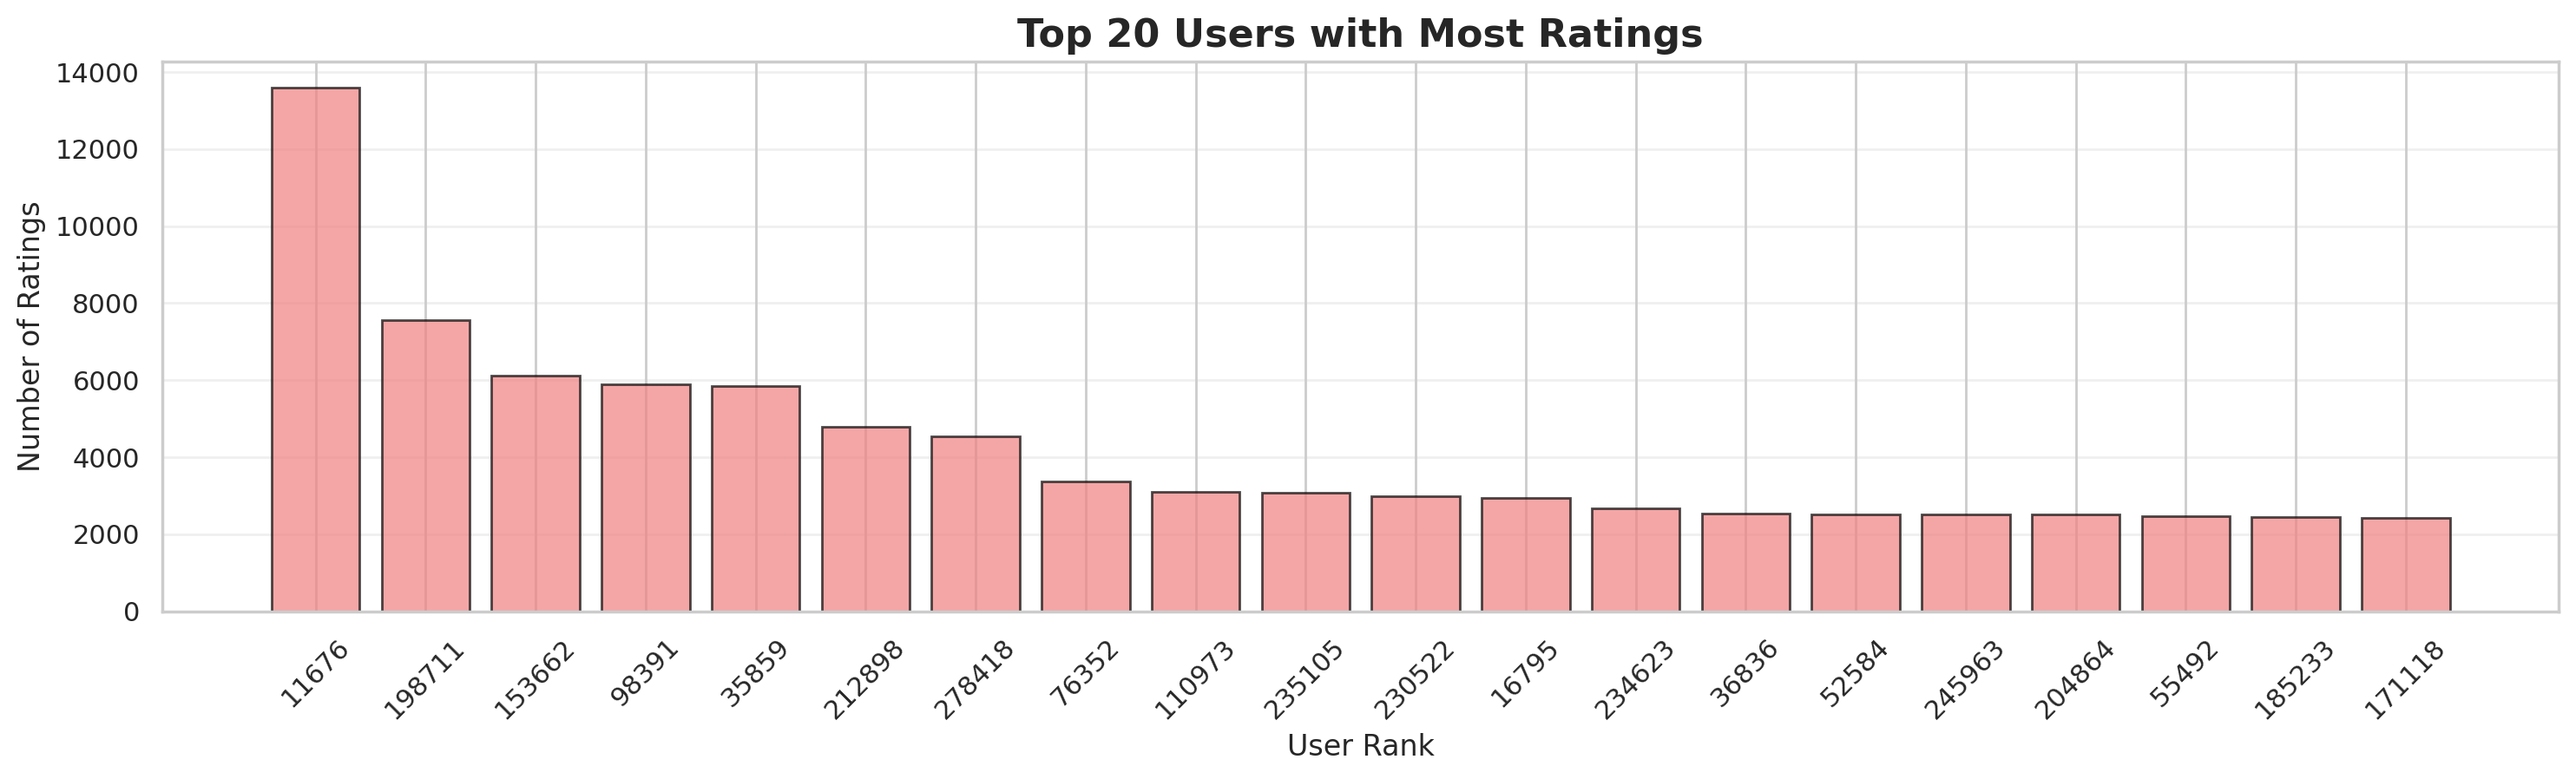

In [24]:
top_users = ratings['User-ID'].value_counts().head(20)

plt.figure(figsize=(15, 8), dpi=200)
plt.subplot(2, 1, 1)

bars = plt.bar(top_users.index.astype(str), top_users.values, color='lightcoral', alpha=0.7, edgecolor='black')

plt.title('Top 20 Users with Most Ratings', fontsize=16, fontweight='bold')
plt.xlabel('User Rank', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(range(len(top_users)), top_users.index, rotation=45)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

**Insight** : User yang paling banyak memberikan rating pada dataset adalah User 11676 dengan 13.602 rating.

#### Rating distribution

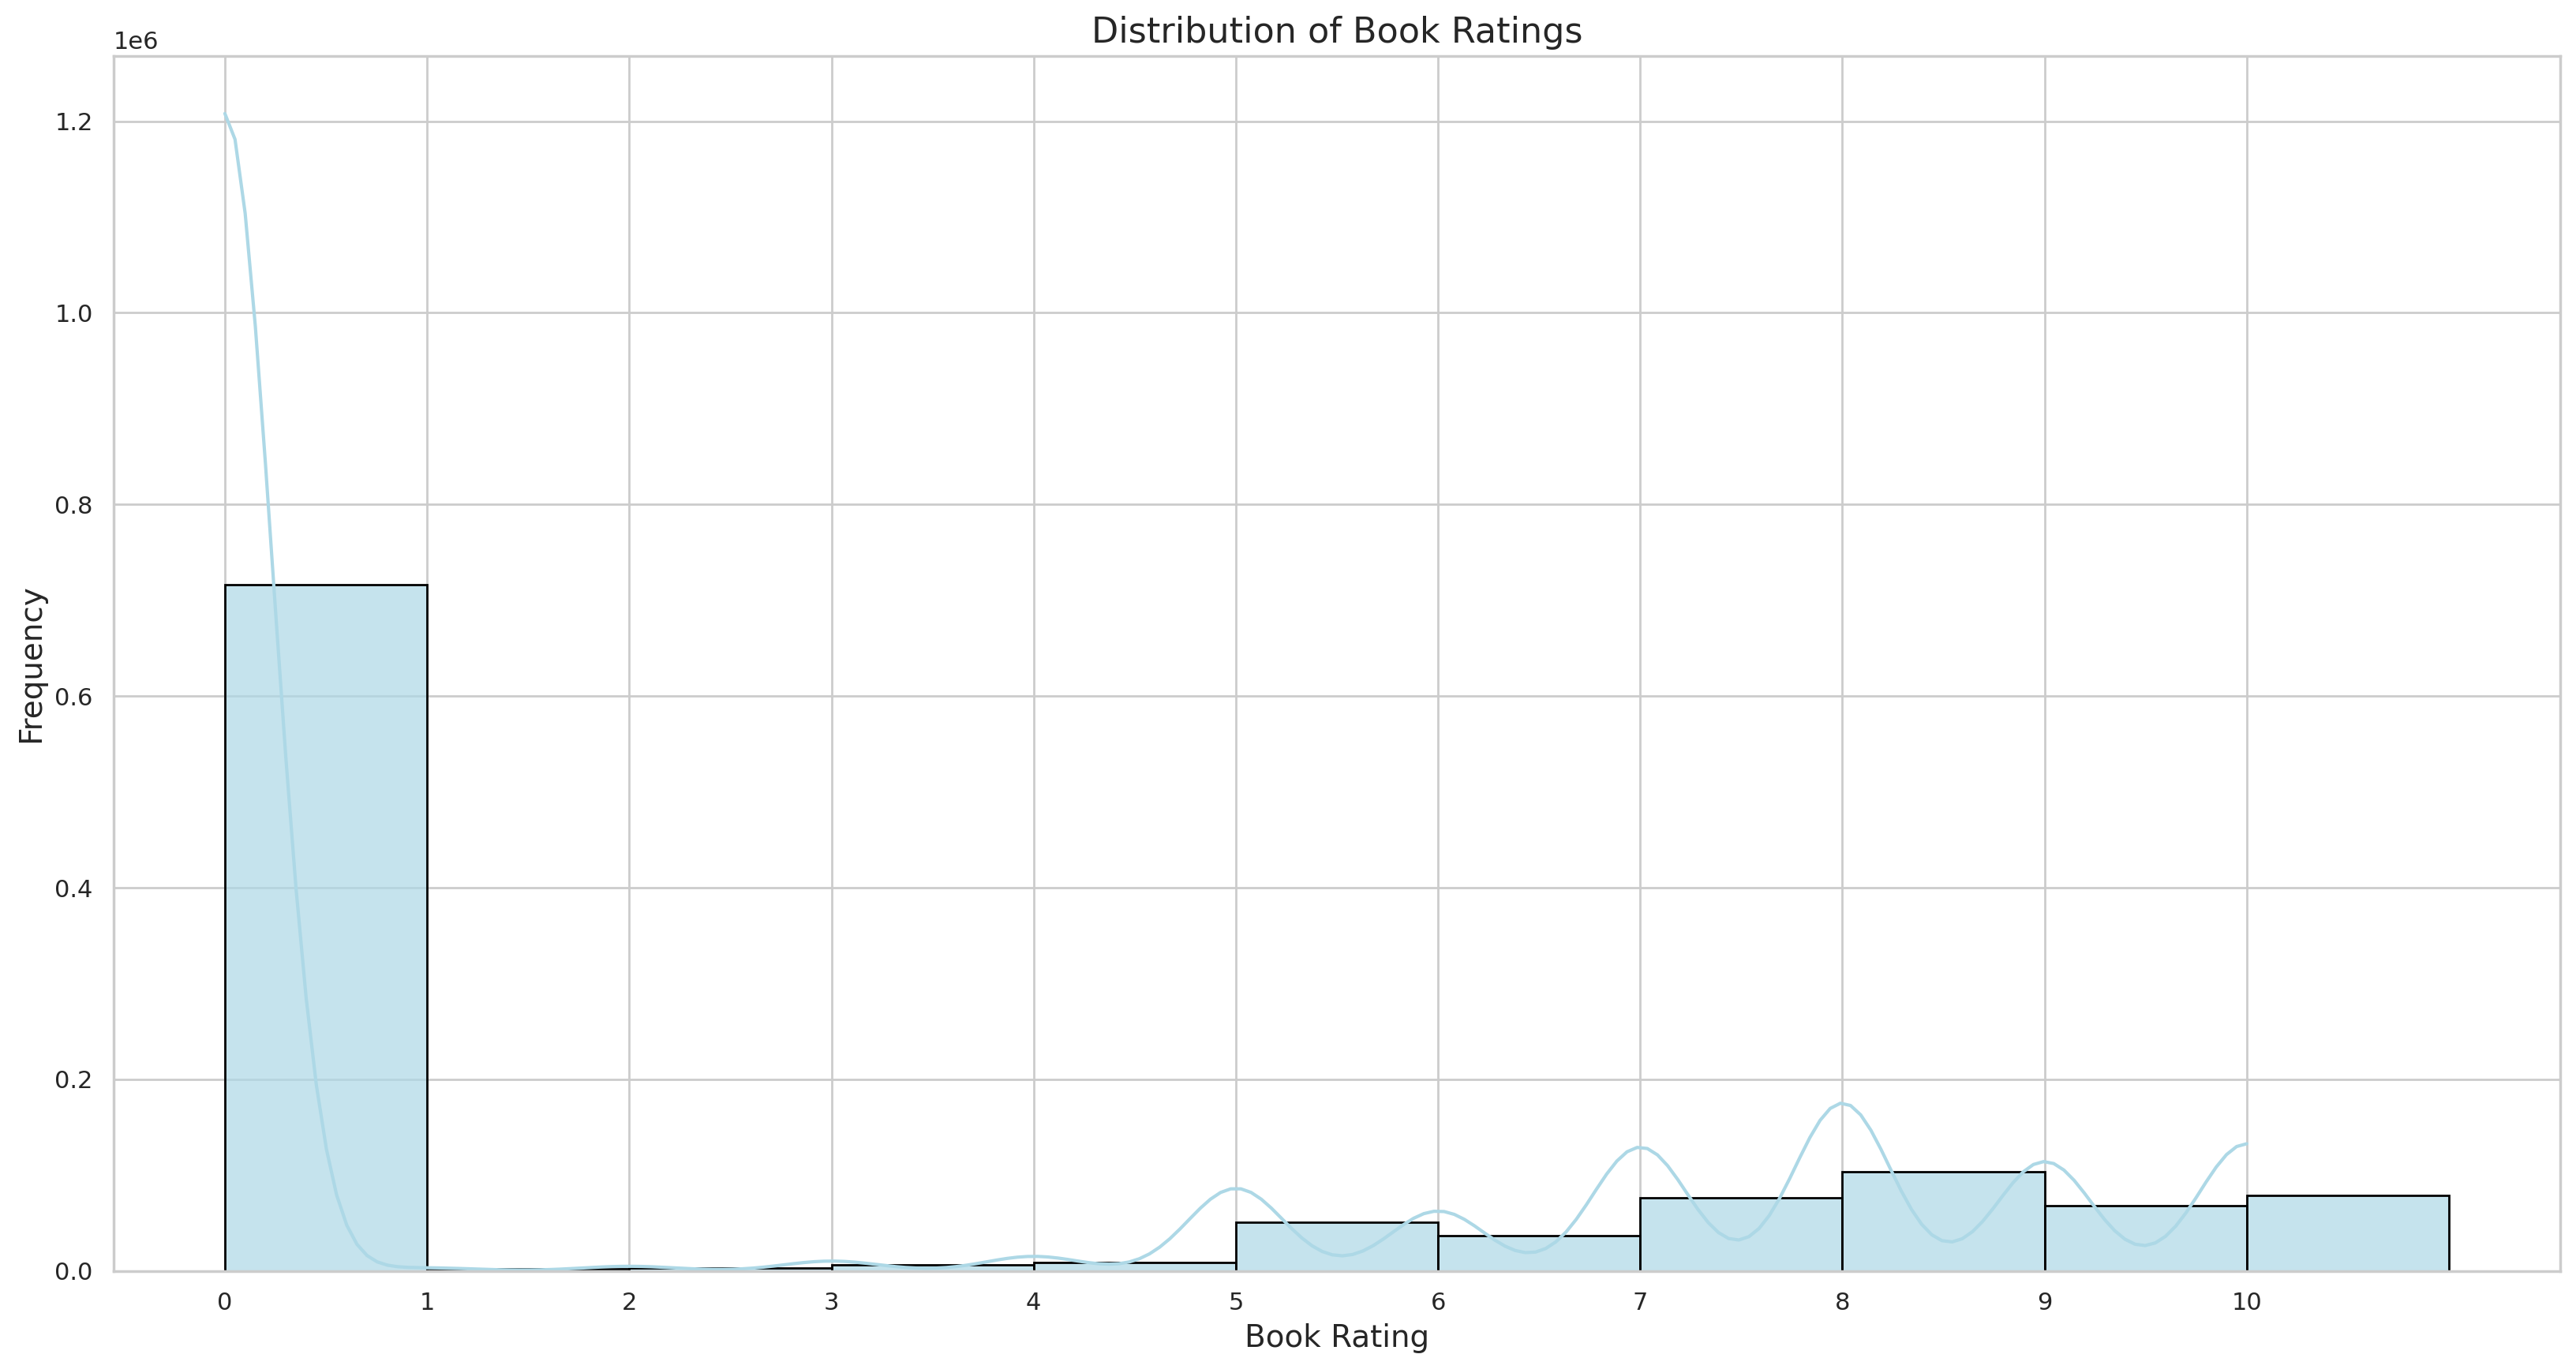

In [25]:
# Pilihan 1: Histplot (paling mirip dengan gambar asli)
plt.figure(figsize=(20,10), dpi=200)
sns.histplot(data=ratings, x='Book-Rating', bins=range(0, 12), kde=True, 
             color='lightblue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Book Ratings', fontsize=16)
plt.xlabel('Book Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(range(0, 11))
plt.show()

In [26]:
ratings[ratings['Book-Rating'] == 0]

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
2,276727,0446520802,0
5,276733,2080674722,0
10,276746,0425115801,0
11,276746,0449006522,0
...,...,...,...
1149769,276704,059032120X,0
1149770,276704,0679752714,0
1149772,276704,080410526X,0
1149774,276704,0876044011,0


**Insight** : Ada banyak sekali rating yang memiliki nilai 0. Bahkan, rating pada dataset ini didominasi dengan rating 0.

## Data Preparation

### Mengatasi Missing Value
Berdasarkan analisis sebelumnya, ditemukan adanya missing value pada books dataframe dan users dataframe, pada tahap ini, kita akan handling missing value tersebut dengan metode dropna. 

In [27]:
books.dropna(inplace=True)

print('Missing values pada buku:')
print(books.isnull().sum())

Missing values pada buku:
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64


In [120]:
users.dropna(inplace=True)

print('Missing values pada user:')
print(users.isnull().sum())

Missing values pada user:
User-ID     0
Location    0
Age         0
dtype: int64


**Insight** : Berhasil mengatasi missing value.

### Drop rating 0

Tidak ada keterangan apakah nilai 0 merupakan rating murni user akan suatu buku, atau nilai 0 merupakan nilai default untuk user yang belum melakukan rating. Karena itu kita hanya memilih rating dengan nilai pada rentang 1 hingga 10.

In [29]:
ratings = ratings[ratings['Book-Rating'] != 0]

In [30]:
print('Banyak data:', ratings.shape[0] - ratings.duplicated(subset=['User-ID', 'ISBN']).sum())
print('Nilai rating yang ada pada dataset:', np.sort(ratings['Book-Rating'].unique()))
print('Banyak user yang memberikan rating:', len(ratings['User-ID'].unique()))

Banyak data: 433671
Nilai rating yang ada pada dataset: [ 1  2  3  4  5  6  7  8  9 10]
Banyak user yang memberikan rating: 77805


**Insight:** Berhasil memilih rating dengan rentang 1-10.

### Sampling data

Karena keterbatasan sumber daya, kita akan melakukan sampling terlebih dahulu untuk melakukan eksplorasi lebih lanjut. Kita akan melakukan sampling dengan menggunakan library numpy fungsi random.choice(). Ukuran sampling yang digunakan adalah 100.000 data.

In [72]:
sampled_books = np.random.choice(books.ISBN.unique(), size=100000, replace=False)
subset_books = books[books.ISBN.isin(sampled_books)]

In [73]:
subset_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
13,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...
16,1575663937,More Cunning Than Man: A Social History of Rat...,Robert Hendrickson,1999,Kensington Publishing Corp.,http://images.amazon.com/images/P/1575663937.0...,http://images.amazon.com/images/P/1575663937.0...,http://images.amazon.com/images/P/1575663937.0...
...,...,...,...,...,...,...,...,...
271362,020130998X,The Unified Modeling Language Reference Manual...,James Rumbaugh,1998,Addison-Wesley Professional,http://images.amazon.com/images/P/020130998X.0...,http://images.amazon.com/images/P/020130998X.0...,http://images.amazon.com/images/P/020130998X.0...
271363,2268032019,Petite histoire de la dÃ?Â©sinformation,Vladimir Volkoff,1999,Editions du Rocher,http://images.amazon.com/images/P/2268032019.0...,http://images.amazon.com/images/P/2268032019.0...,http://images.amazon.com/images/P/2268032019.0...
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


**Insight** : Berhasil melakukan sampling dataframe books dengan 100.000 data.

In [74]:
sampled_users = np.random.choice(users['User-ID'].unique(), size=100000, replace=False)
subset_users = users[users['User-ID'].isin(sampled_users)]

In [75]:
subset_users

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0
...,...,...,...
278837,278838,"massillon, ohio, usa",15.0
278839,278840,"encinitas, california, usa",45.0
278842,278843,"pismo beach, california, usa",28.0
278845,278846,"toronto, ontario, canada",23.0


**Insight** : Berhasil melakukan sampling dataframe users dengan 100.000 data.

In [76]:
subset_ratings = ratings[
    (ratings.ISBN.isin(sampled_books)) & 
    (ratings['User-ID'].isin(sampled_users))
].drop_duplicates(subset=['User-ID', 'ISBN'])

subset_ratings

,User-ID,ISBN,Book-Rating
21,276747,0943066433,7
24,276748,0747558167,6
28,276754,0684867621,8
77,276786,8437606322,8
86,276796,0330332775,5
...,...,...,...
1149587,276680,068486892X,6
1149588,276680,0688158129,7
1149591,276680,0743203232,7
1149623,276680,1402201435,4


**Insight** : Berhasil melakukan sampling dataframe rating yang memiliki buku dan user yang telah dilakukan sampling.

In [77]:
print('Dataset subset:')
print('Jumlah buku:', len(subset_books.ISBN.unique()))
print('Jumlah rating:', len(subset_ratings))
print('Jumlah user:', len(subset_users['User-ID'].unique()))

Dataset subset:
Jumlah buku: 100000
Jumlah rating: 60498
Jumlah user: 100000


**Insight** : Setelah sampling, data yang dimiliki adalah 100.000 jenis buku, 60.498 data rating, dan 100.000 jumlah user.

### Menggabungkan Buku

In [78]:
all_books = np.concatenate((
    subset_books['ISBN'].unique(),
    subset_ratings['ISBN'].unique(),
))

all_books = np.sort(np.unique(all_books))
print('Jumlah seluruh buku pada dasaset berdasarkan ISBN:', len(all_books))

Jumlah seluruh buku pada dasaset berdasarkan ISBN: 100000


**Insight** : Jumlah seluruh buku berdasarkan ISBN ada sebanyak 100.000 data.

**Proses** : Melakukan penggabungan data isbn pada dataframe subset_books dan subset_ratings.

**Alasan perlu dilakukan** : Untuk memastikan data ISBN yang terdapat pada subset_rating dimiliki informasinya pada dataset kita.

### Menggabungkan Seluruh Users

In [79]:
all_users = np.concatenate((
    subset_users['User-ID'].unique(),
    subset_ratings['User-ID'].unique(),
))

all_users = np.sort(np.unique(all_users))
print('Jumlah seluruh user pada dasaset berdasarkan User-ID:', len(all_users))

Jumlah seluruh user pada dasaset berdasarkan User-ID: 100000


**Insight** : Terdapat 100.000 data user pada dataset.

**Proses** : Melakkan penggabungan data User-ID pada dataframe subset_users dan subset_ratings.

**Alasan perlu dilakukan** : Untuk memastikan kita memiliki informasi User-ID yang melakukan rating.

### Menggabungkan dataframe subset_books dan subset_ratings

In [80]:
book_info = pd.merge(subset_ratings, subset_books, on='ISBN', how='inner')

book_info

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276747,0943066433,7,How to Deal With Difficult People,Rick Brinkman,1995,Careertrack Inc.,http://images.amazon.com/images/P/0943066433.0...,http://images.amazon.com/images/P/0943066433.0...,http://images.amazon.com/images/P/0943066433.0...
1,276748,0747558167,6,Apricots on the Nile: A Memoir with Recipes,Colette Rossant,2002,Bloomsbury Publishing Plc,http://images.amazon.com/images/P/0747558167.0...,http://images.amazon.com/images/P/0747558167.0...,http://images.amazon.com/images/P/0747558167.0...
2,276754,0684867621,8,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999,Scribner,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...
3,276786,8437606322,8,Anna Karenina,Leo Tolstoy,1999,Ediciones Catedra S.A.,http://images.amazon.com/images/P/8437606322.0...,http://images.amazon.com/images/P/8437606322.0...,http://images.amazon.com/images/P/8437606322.0...
4,276796,0330332775,5,Bridget Jones's Diary,Helen Fielding,1997,Picador (UK),http://images.amazon.com/images/P/0330332775.0...,http://images.amazon.com/images/P/0330332775.0...,http://images.amazon.com/images/P/0330332775.0...
...,...,...,...,...,...,...,...,...,...,...
60493,276680,068486892X,6,Round Robin : An Elm Creek Quilts Novel (Elm C...,Jennifer Chiaverini,2000,Simon & Schuster,http://images.amazon.com/images/P/068486892X.0...,http://images.amazon.com/images/P/068486892X.0...,http://images.amazon.com/images/P/068486892X.0...
60494,276680,0688158129,7,The Pact : A Love Story,Jodi Picoult,1998,William Morrow,http://images.amazon.com/images/P/0688158129.0...,http://images.amazon.com/images/P/0688158129.0...,http://images.amazon.com/images/P/0688158129.0...
60495,276680,0743203232,7,The Nature of Water and Air,Regina McBride,2001,Touchstone,http://images.amazon.com/images/P/0743203232.0...,http://images.amazon.com/images/P/0743203232.0...,http://images.amazon.com/images/P/0743203232.0...
60496,276680,1402201435,4,The One True Ocean,Sarah Beth Martin,2003,Sourcebooks Landmark,http://images.amazon.com/images/P/1402201435.0...,http://images.amazon.com/images/P/1402201435.0...,http://images.amazon.com/images/P/1402201435.0...


In [81]:
book_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60498 entries, 0 to 60497
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User-ID              60498 non-null  int64 
 1   ISBN                 60498 non-null  object
 2   Book-Rating          60498 non-null  int64 
 3   Book-Title           60498 non-null  object
 4   Book-Author          60498 non-null  object
 5   Year-Of-Publication  60498 non-null  int64 
 6   Publisher            60498 non-null  object
 7   Image-URL-S          60498 non-null  object
 8   Image-URL-M          60498 non-null  object
 9   Image-URL-L          60498 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.6+ MB


**Insight** : Dataframe book_info terdiri dari 3 data numerik dan 7 data kategorikal yang berisi data rating dan identitas buku.

**Proses** : Melakukan merge dataframe subset_books dan subset_ratings berdasarkan ISBN dengan metode inner untuk memastikan tidak ada data kosong.

**Alasan perlu dilakukan** : Untuk mempermudah pencarian informasi mengenai buku hasil rekomendasi nantinya.

### Mengurutkan dataframe berdasrkan ISBN

In [82]:
preparation = book_info
preparation.sort_values('ISBN')

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
50153,229329,0001935968,10,The Brambly Hedge Treasury,Jill Barklem,1991,HarperCollins Publishers,http://images.amazon.com/images/P/0001935968.0...,http://images.amazon.com/images/P/0001935968.0...,http://images.amazon.com/images/P/0001935968.0...
13489,63714,0001953877,10,Collins guide to dinosaurs,David Lambert,1983,Collins,http://images.amazon.com/images/P/0001953877.0...,http://images.amazon.com/images/P/0001953877.0...,http://images.amazon.com/images/P/0001953877.0...
45725,208410,0001981307,9,The Cross Rabbit (Percy's Park),Nick Butterworth,1994,HarperCollins Publishers,http://images.amazon.com/images/P/0001981307.0...,http://images.amazon.com/images/P/0001981307.0...,http://images.amazon.com/images/P/0001981307.0...
41459,184401,0001981625,8,The Sea of Tranquility,Mark Haddon,1996,HarperCollins Publishers,http://images.amazon.com/images/P/0001981625.0...,http://images.amazon.com/images/P/0001981625.0...,http://images.amazon.com/images/P/0001981625.0...
43075,193560,0002154900,8,Anna and the Black Knight,Fynn,1990,HarperCollins Publishers,http://images.amazon.com/images/P/0002154900.0...,http://images.amazon.com/images/P/0002154900.0...,http://images.amazon.com/images/P/0002154900.0...
...,...,...,...,...,...,...,...,...,...,...
15008,71521,B0000AA9JB,8,A Darkness More Than Night,Michael Connelly,2001,Little Brown & Company,http://images.amazon.com/images/P/B0000AA9JB.0...,http://images.amazon.com/images/P/B0000AA9JB.0...,http://images.amazon.com/images/P/B0000AA9JB.0...
53293,241791,B0000VZEH8,9,Back Roads,Tawni O'Dell,2000,Viking Press,http://images.amazon.com/images/P/B0000VZEH8.0...,http://images.amazon.com/images/P/B0000VZEH8.0...,http://images.amazon.com/images/P/B0000VZEH8.0...
11405,52350,B0000X8HIE,6,THE FIRST TARZAN OMNIBUS: Tarzan of the Apes; ...,Edgar Rice Burroughs,0,PageTurner,http://images.amazon.com/images/P/B0000X8HIE.0...,http://images.amazon.com/images/P/B0000X8HIE.0...,http://images.amazon.com/images/P/B0000X8HIE.0...
24952,106803,B00014WRH4,8,Hornet Flight: A Novel,Ken Follett,0,NAL,http://images.amazon.com/images/P/B00014WRH4.0...,http://images.amazon.com/images/P/B00014WRH4.0...,http://images.amazon.com/images/P/B00014WRH4.0...


**Insight** : ISBN yang ada pada dataframe berhasil diurutkan

**Proses** : memanggil fungsi sort_values()

**Alasan perlu dilakukan** : nantinya ISBN akan diencode sehingga proses ini akan merapikan data buku

### Menghapus duplikasi ISBN

In [83]:
preparation = preparation.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276747,0943066433,7,How to Deal With Difficult People,Rick Brinkman,1995,Careertrack Inc.,http://images.amazon.com/images/P/0943066433.0...,http://images.amazon.com/images/P/0943066433.0...,http://images.amazon.com/images/P/0943066433.0...
1,276748,0747558167,6,Apricots on the Nile: A Memoir with Recipes,Colette Rossant,2002,Bloomsbury Publishing Plc,http://images.amazon.com/images/P/0747558167.0...,http://images.amazon.com/images/P/0747558167.0...,http://images.amazon.com/images/P/0747558167.0...
2,276754,0684867621,8,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999,Scribner,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...
3,276786,8437606322,8,Anna Karenina,Leo Tolstoy,1999,Ediciones Catedra S.A.,http://images.amazon.com/images/P/8437606322.0...,http://images.amazon.com/images/P/8437606322.0...,http://images.amazon.com/images/P/8437606322.0...
4,276796,0330332775,5,Bridget Jones's Diary,Helen Fielding,1997,Picador (UK),http://images.amazon.com/images/P/0330332775.0...,http://images.amazon.com/images/P/0330332775.0...,http://images.amazon.com/images/P/0330332775.0...
...,...,...,...,...,...,...,...,...,...,...
60487,276680,0670880973,2,Cordelia Underwood: Or the Marvelous Beginning...,Van Reid,1998,Penguin USA,http://images.amazon.com/images/P/0670880973.0...,http://images.amazon.com/images/P/0670880973.0...,http://images.amazon.com/images/P/0670880973.0...
60488,276680,0671724479,9,ONCE UPON A TIME ON THE BANKS : ONCE UPON A TI...,Cathie Pelletier,1991,Washington Square Press,http://images.amazon.com/images/P/0671724479.0...,http://images.amazon.com/images/P/0671724479.0...,http://images.amazon.com/images/P/0671724479.0...
60489,276680,067179387X,9,The WEIGHT OF WINTER,Cathie Pelletier,1993,Washington Square Press,http://images.amazon.com/images/P/067179387X.0...,http://images.amazon.com/images/P/067179387X.0...,http://images.amazon.com/images/P/067179387X.0...
60490,276680,0671883925,8,LOVE (Virago Modern Classics),Elizabeth Von arnim,1995,Washington Square Press,http://images.amazon.com/images/P/0671883925.0...,http://images.amazon.com/images/P/0671883925.0...,http://images.amazon.com/images/P/0671883925.0...


**Insight** : Data duplikat ISBN berhasil dibersihkan

**Proses** : Memanggil fungsi drop_duplicates()

**Alasan perlu dilakukan** : ISBN merupakan International Standard Book Number yang berarti ISBN bernilai unik. Duplikasi ISBN perlu dibersihkan supaya tidak terjadi kebingungan.

### Membuat fungsi encode dan decode

In [84]:
df = subset_ratings
df

,User-ID,ISBN,Book-Rating
21,276747,0943066433,7
24,276748,0747558167,6
28,276754,0684867621,8
77,276786,8437606322,8
86,276796,0330332775,5
...,...,...,...
1149587,276680,068486892X,6
1149588,276680,0688158129,7
1149591,276680,0743203232,7
1149623,276680,1402201435,4


In [85]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['User-ID'].unique().tolist()
print('list userID: ', user_ids)
    
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
    
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [276747, 276748, 276754, 276786, 276796, 276800, 276808, 276847, 276853, 276861, 276866, 276872, 276925, 276928, 276929, 276939, 276953, 276954, 276964, 276984, 276986, 276998, 277051, 277085, 277116, 277128, 277187, 277195, 277203, 277228, 277261, 277272, 277315, 277351, 277378, 277427, 277432, 277436, 277439, 277471, 277478, 277509, 277559, 277574, 277575, 277619, 277629, 277665, 277680, 277681, 277710, 277711, 277727, 277737, 277752, 277778, 277802, 277823, 277844, 277879, 277901, 277909, 277928, 277929, 277937, 277954, 277988, 277992, 277996, 278019, 278030, 278075, 278098, 278110, 278111, 278119, 278185, 278188, 278204, 278209, 278218, 278255, 278279, 278345, 278350, 278356, 278358, 278389, 278390, 278435, 278461, 278469, 278488, 278524, 278543, 278550, 278552, 278563, 278571, 278694, 278710, 278715, 278807, 278818, 278820, 278824, 278843, 278846, 42, 51, 92, 133, 178, 183, 232, 242, 310, 339, 361, 372, 387, 388, 392, 408, 424, 433, 444, 496, 500, 503, 505, 595, 638,

In [86]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
isbn_ids = df['ISBN'].unique().tolist()
print('list ISBN: ', isbn_ids)
    
# Melakukan proses encoding ISBN
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_ids)}
print('encoded ISBN : ', isbn_to_isbn_encoded)
    
# Melakukan proses encoding angka ke ISBN
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_ids)}
print('encoded angka ke ISBN: ', isbn_encoded_to_isbn)

list ISBN:  ['0943066433', '0747558167', '0684867621', '8437606322', '0330332775', '1562827898', '0395547032', '3404921178', '3442435773', '3442437717', '3442446414', '3442449820', '3453137442', '3499222213', '3499433443', '3506464078', '360893541X', '3608935436', '3821815191', '8448034023', '3446200452', '349223903X', '3499231603', '340645724X', '345309221X', '3453130901', '0425167097', '042518109X', '8571648972', '0140154078', '0553275283', '0582530431', '840149236X', '8420444367', '8426109799', '059030271X', '0671026283', '2253172367', '2266102621', '2743602295', '2842611462', '2869305583', '2070419657', '2878580753', '8423310353', '0446310786', '3423118709', '0312169817', '0345348672', '0425104273', '0812550307', '0886773741', '0886775957', '0590436449', '0590436465', '0590442589', '0590442996', '0060930187', '0689817851', '0874869870', '3822858617', '0075536498', '0553262505', '0434009407', '1841193887', '3548208975', '0140118608', '0679745203', '0553379615', '0670869902', '067164

**Insight** : Fitur User_ID dan ISBN berhasil memiliki fungsi encode dan decode

**Proses** : Pada masing-masing fitur diambil nilai uniknya terlebih dahulu, kemudian membuat dictionary yang berisi nilai asal dan hasil encoding, begotu jug auntuk proses decode

**Alasan perlu dilakukan** : Karena model tidak dapat memproses data kategorikal sehingga perlu dilakukan encoding terlebih dahulu

### Mapping hasil encoding ke dataframe

In [87]:
# Mapping User-ID ke dataframe user
df['user'] = df['User-ID'].map(user_to_user_encoded)
    
# Mapping ISBN ke dataframe isbn
df['isbn'] = df['ISBN'].map(isbn_to_isbn_encoded)

In [88]:
df

,User-ID,ISBN,Book-Rating,user,isbn
21,276747,0943066433,7,0,0
24,276748,0747558167,6,1,1
28,276754,0684867621,8,2,2
77,276786,8437606322,8,3,3
86,276796,0330332775,5,4,4
...,...,...,...,...,...
1149587,276680,068486892X,6,14019,24539
1149588,276680,0688158129,7,14019,1737
1149591,276680,0743203232,7,14019,12049
1149623,276680,1402201435,4,14019,31347


**Insight** : Berhasil melakukan encoding fitur user dan isbn

**Proses** : Mmmanggil fungsi map()

**Alasan perlu dilakukan** : Karena model tidak dapat memproses data kategorikal sehingga perlu dilakukan encoding terlebih dahulu

### Mendapatkan nilai minimun dan maksimum rating untuk normalisasi

In [89]:
min_rating = min(df['Book-Rating'])
    
max_rating = max(df['Book-Rating'])
    
print(' Min Rating: {}, Max Rating: {}'.format(
    min_rating, max_rating
))

 Min Rating: 1, Max Rating: 10


**Insight** : Rating memiliki nilai minimum 1 dan maksimum 10

**Proses** : memanggil fungsi min() dan max()

**Alasan perlu dilakukan** : Data minimum dan maksimum akan digunakan dalam proses normalisasi untuk meningkatkan kinerja model

### Mengacak data pada dataset

In [90]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [91]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Rating,user,isbn
348631,83287,0451192001,10,4294,3904
990244,238120,0671759345,4,12024,2640
909131,221232,0064401987,7,11120,16500
937404,227436,0747520224,4,11456,27350
502085,121606,0671003755,7,6196,438
...,...,...,...,...,...
1023950,245604,0316089699,7,12429,527
689704,167872,2266047426,7,8469,22622
20322,3827,015201800X,6,274,824
315476,76151,0373291221,5,3910,10970


**Insight** : data pada Dataframe berhasil diacak

**Proses** : Memanggil fungsi sample()

**Alasan perlu dilakukan** : Untuk meningkatkan generalisasi, salah satunya dengan menghindari urutan bias

### Membagi Data untuk Training dan Validasi

In [92]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'isbn']].values
    
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
    
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
    
print(x, y)

[[ 4294  3904]
 [12024  2640]
 [11120 16500]
 ...
 [  274   824]
 [ 3910 10970]
 [12927  9925]] [1.         0.33333333 0.66666667 ... 0.55555556 0.44444444 0.66666667]


**Insight** : Data berhasil dibagi menjadi data train dan validasi dengan variabel x dan y (target)

**Proses** : Pada variabel x dilakukan pengambilan values pada fitur user dan isbn, variabel y dengan fitur rating yang dilakukan proses normalisasi terlebih dahulu. setelah itu data dibagi dengan proporsi 80:20 

**Alasan perlu dilakukan** : Menentukan data training dan data validasi untuk model belajar

## Modeling dan Result

### Model Development dengan Collaborative Filtering

#### Proses Training

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_books, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_books = num_books
        self.embedding_size = embedding_size
        
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-4)  
        )
        
        self.user_bias = layers.Embedding(
            num_users, 
            1,
            embeddings_regularizer=keras.regularizers.l2(1e-4)  
        )
        
        self.book_embedding = layers.Embedding(
            num_books,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-4) 
        )
        
        self.book_bias = layers.Embedding(
            num_books, 
            1,
            embeddings_regularizer=keras.regularizers.l2(1e-4)  
        )
        
        self.dropout1 = layers.Dropout(0.4)  
        self.dropout2 = layers.Dropout(0.3)  
        
        self.batch_norm = layers.BatchNormalization()
        
    def call(self, inputs, training=None):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias = self.book_bias(inputs[:, 1])
        
        user_vector = self.dropout1(user_vector, training=training)
        book_vector = self.dropout2(book_vector, training=training)
        
        # Dot product
        dot_user_book = tf.tensordot(user_vector, book_vector, 2)
        
        # Combine features
        x = dot_user_book + user_bias + book_bias
        
        # Batch normalization
        x = self.batch_norm(x, training=training)
        
        return tf.nn.sigmoid(x)

Penyusunan model

1. Arsitektur Model
   - Embedding Layers
      - User Embedding: Merepresentasikan karakteristik setiap user dalam ruang vektor 50 dimensi
      - Book Embedding: Merepresentasikan karakteristik setiap buku dalam ruang vektor 50 dimensi
      - Bias Terms: Menangkap preferensi global user dan popularitas buku
   - Dot Product Operation
      - Menghitung similarity antara user dan book vectors
      - tf.tensordot(user_vector, book_vector, 2) menghasilkan skor kompatibilitas
   - Final Prediction
     - Kombinasi: dot_product + user_bias + book_bias
     - Aktivasi sigmoid untuk output probabilitas (0-1)

In [94]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
    
# Mendapatkan jumlah isbn
num_books = len(isbn_encoded_to_isbn)
print(num_books)

14020
31348


In [ ]:
model = RecommenderNet(num_users, num_books, 24)

# Model compile 
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0003),  
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=7,  
        restore_best_weights=True,
        verbose=1
    ),
    
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

In [ ]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,  
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - loss: 0.6908 - root_mean_squared_error: 0.3161 - val_loss: 0.6002 - val_root_mean_squared_error: 0.2418 - learning_rate: 3.0000e-04
Epoch 2/100
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - loss: 0.5718 - root_mean_squared_error: 0.2125 - val_loss: 0.5595 - val_root_mean_squared_error: 0.2011 - learning_rate: 3.0000e-04
Epoch 3/100
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - loss: 0.5226 - root_mean_squared_error: 0.1572 - val_loss: 0.5500 - val_root_mean_squared_error: 0.1915 - learning_rate: 3.0000e-04
Epoch 4/100
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - loss: 0.4997 - root_mean_squared_error: 0.1295 - val_loss: 0.5513 - val_root_mean_squared_error: 0.1916 - learning_rate: 3.0000e-04
Epoch 5/100
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - loss: 0.4886 - root_mean_squared_error: 0.1165 - val_loss: 0.5566 - val_root_mean_squared_error: 0.1952 - learning_rate: 3.0000e-04
Epoch 6/100
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 45

**Insight:** : Callback EarlyStopping berhasil mengehentikan pelatihan model (pencegahan overfit)

### Mendapatkan Rekomendasi ISBN

In [118]:
import pandas as pd
import numpy as np
import random
from IPython.display import HTML, display

def get_book_recommendations(model, user_to_user_encoded, isbn_to_isbn_encoded, 
                           subset_users, subset_ratings, book_info, user_id=None, 
                           add_randomness=True, randomness_level=0.1):
    """
    Get book recommendations with optional randomness for variety.
    
    Parameters:
    - add_randomness: Whether to add noise to predictions for variety
    - randomness_level: Amount of noise to add (0.05 = subtle, 0.2 = more variety)
    """
    
    if user_id is None:
        user_id = subset_users['User-ID'].sample(1).iloc[0]
    
    print(f"🔍 Processing recommendations for User ID: {user_id}")
    if add_randomness:
        print(f"🎲 Adding randomness (level: {randomness_level})")
    
    if user_id not in user_to_user_encoded:
        print(f"❌ User {user_id} not found in user encodings")
        return None
    
    user_encoder = user_to_user_encoded[user_id]
    print(f"   User encoder: {user_encoder} (type: {type(user_encoder)})")
    
    try:
        user_encoder = int(user_encoder)
    except (ValueError, TypeError):
        print(f"❌ Invalid user encoder: {user_encoder}")
        return None
    
    books_rated_by_user = subset_ratings[subset_ratings['User-ID'] == user_id]
    
    all_books = set(subset_ratings['ISBN'].unique())
    books_rated = set(books_rated_by_user['ISBN'].values)
    books_not_rated = list(all_books - books_rated)
    
    print(f"   Books rated by user: {len(books_rated_by_user)}")
    print(f"   Books not rated: {len(books_not_rated)}")
    
    valid_user_book_pairs = []
    valid_books = []
    
    for book_isbn in books_not_rated:
        if book_isbn in isbn_to_isbn_encoded:
            book_encoder = isbn_to_isbn_encoded[book_isbn]
            
            try:
                book_encoder = int(book_encoder)
                valid_user_book_pairs.append([user_encoder, book_encoder])
                valid_books.append(book_isbn)
            except (ValueError, TypeError):
                continue
    
    print(f"   Valid books for prediction: {len(valid_books)}")
    
    if len(valid_user_book_pairs) == 0:
        print("❌ No valid books available for recommendation")
        return None
    
    user_book_array = np.array(valid_user_book_pairs, dtype=np.int32)
    
    print(f"   Array shape: {user_book_array.shape}")
    print(f"   Array dtype: {user_book_array.dtype}")
    print(f"   Array min/max: {user_book_array.min()}/{user_book_array.max()}")
    print()
    
    if np.any(np.isnan(user_book_array)) or np.any(np.isinf(user_book_array)):
        print("❌ Array contains NaN or Inf values")
        return None
    
    try:
        # Get predictions from the model
        predictions = model.predict(user_book_array, verbose=0).flatten()
        
        # Add randomness if requested
        if add_randomness:
            noise = np.random.normal(0, randomness_level, len(predictions))
            predictions = predictions + noise
        
        top_indices = predictions.argsort()[-10:][::-1]
        recommended_book_scores = [(valid_books[i], predictions[i]) for i in top_indices]
        
        print("🎯 USER-BASED BOOK RECOMMENDATIONS")
        print("="*60)
        print(f"👤 User ID: {user_id}")
        print(f"📊 Books rated by user: {len(books_rated_by_user)}")
        print(f"🔮 Generated recommendations from {len(valid_books)} unrated books")
        print()
        
        print("📚 USER'S TOP RATED BOOKS")
        print("-"*40)
        if len(books_rated_by_user) > 0:
            top_user_books = books_rated_by_user.sort_values('Book-Rating', ascending=False).head(3)
            
            for idx, (_, book_row) in enumerate(top_user_books.iterrows(), 1):
                book_details = book_info[book_info['ISBN'] == book_row['ISBN']]
                if len(book_details) > 0:
                    book_detail = book_details.iloc[0]
                    print(f"⭐ {book_row['Book-Rating']}/10 | {book_detail['Book-Title']}")
                    print(f"   👤 {book_detail['Book-Author']}")
                    
                    if pd.notna(book_detail.get('Image-URL-M')):
                        display(HTML(f'<img src="{book_detail["Image-URL-M"]}" style="width:80px; height:120px; object-fit:cover; border-radius:5px; margin:5px 0;">'))
                    print()
        else:
            print("❌ No rated books found for this user")
        
        print()
        print("🤖 TOP 5 ML RECOMMENDATIONS")
        print("="*50)
        
        for rank, (isbn, score) in enumerate(recommended_book_scores[:5], 1):
            book_details = book_info[book_info['ISBN'] == isbn]
            
            if len(book_details) > 0:
                book_detail = book_details.iloc[0]
                
                rank_emoji = {1: "🥇", 2: "🥈", 3: "🥉", 4: "4️⃣", 5: "5️⃣"}
                
                print(f"{rank_emoji[rank]} RANK #{rank} | Predicted Rating: {score:.3f}")
                print(f"📖 {book_detail['Book-Title']}")
                print(f"✍️  {book_detail['Book-Author']}")
                print(f"🏷️  {book_detail.get('Publisher', 'Unknown Publisher')}")
                
                if pd.notna(book_detail.get('Image-URL-M')):
                    display(HTML(f'<img src="{book_detail["Image-URL-M"]}" style="width:100px; height:150px; object-fit:cover; border-radius:5px; margin:5px 0;">'))
                else:
                    print("📷 No image available")
                
                print("-" * 40)
        
        return recommended_book_scores
        
    except Exception as e:
        print(f"❌ Error during prediction: {str(e)}")
        print(f"   Error type: {type(e).__name__}")
        return None

def validate_encodings(user_to_user_encoded, isbn_to_isbn_encoded):
    print("🔍 VALIDATING ENCODINGS")
    print("-"*30)
    
    invalid_users = []
    for user_id, encoding in user_to_user_encoded.items():
        try:
            int(encoding)
        except (ValueError, TypeError):
            invalid_users.append((user_id, encoding))
    
    invalid_isbns = []
    for isbn, encoding in isbn_to_isbn_encoded.items():
        try:
            int(encoding)
        except (ValueError, TypeError):
            invalid_isbns.append((isbn, encoding))
    
    print(f"✅ Valid user encodings: {len(user_to_user_encoded) - len(invalid_users)}")
    print(f"❌ Invalid user encodings: {len(invalid_users)}")
    print(f"✅ Valid ISBN encodings: {len(isbn_to_isbn_encoded) - len(invalid_isbns)}")
    print(f"❌ Invalid ISBN encodings: {len(invalid_isbns)}")
    
    if invalid_users:
        print(f"\nInvalid user encodings (first 5): {invalid_users[:5]}")
    if invalid_isbns:
        print(f"Invalid ISBN encodings (first 5): {invalid_isbns[:5]}")
    
    return len(invalid_users) == 0 and len(invalid_isbns) == 0

def fix_encodings(df, user_col='User-ID', isbn_col='ISBN'):
    print("🛠️  CREATING CLEAN ENCODINGS")
    print("-"*30)
    
    unique_users = sorted(df[user_col].unique())
    unique_isbns = sorted(df[isbn_col].unique())
    
    user_to_user_encoded = {user_id: idx for idx, user_id in enumerate(unique_users)}
    isbn_to_isbn_encoded = {isbn: idx for idx, isbn in enumerate(unique_isbns)}
    
    user_encoded_to_user = {idx: user_id for user_id, idx in user_to_user_encoded.items()}
    isbn_encoded_to_isbn = {idx: isbn for isbn, idx in isbn_to_isbn_encoded.items()}
    
    print(f"✅ Created {len(user_to_user_encoded)} user encodings")
    print(f"✅ Created {len(isbn_to_isbn_encoded)} ISBN encodings")
    print(f"📊 User encoding range: 0 to {len(user_to_user_encoded)-1}")
    print(f"📊 ISBN encoding range: 0 to {len(isbn_to_isbn_encoded)-1}")
    
    return user_to_user_encoded, isbn_to_isbn_encoded, user_encoded_to_user, isbn_encoded_to_isbn

In [119]:
recommendations = get_book_recommendations(
    model=model,
    user_to_user_encoded=user_to_user_encoded,
    isbn_to_isbn_encoded=isbn_to_isbn_encoded,
    subset_users=df,
    subset_ratings=df,
    book_info=book_info
)

🔍 Processing recommendations for User ID: 114368
🎲 Adding randomness (level: 0.1)
   User encoder: 5850 (type: <class 'int'>)
   Books rated by user: 226
   Books not rated: 31122
   Valid books for prediction: 31122
   Array shape: (31122, 2)
   Array dtype: int32
   Array min/max: 0/31347

🎯 USER-BASED BOOK RECOMMENDATIONS
👤 User ID: 114368
📊 Books rated by user: 226
🔮 Generated recommendations from 31122 unrated books

📚 USER'S TOP RATED BOOKS
----------------------------------------
⭐ 10/10 | Tears of the Moon (Irish Trilogy)
   👤 Nora Roberts



⭐ 10/10 | Born in Shame
   👤 Nora Roberts



⭐ 10/10 | Birthright
   👤 Nora Roberts




🤖 TOP 5 ML RECOMMENDATIONS
🥇 RANK #1 | Predicted Rating: 1.089
📖 The Audubon Society Field Guide to North American Birds: Eastern Region
✍️  John Bull
🏷️  Random House USA Inc


----------------------------------------
🥈 RANK #2 | Predicted Rating: 1.084
📖 Emergence : Labeled Autistic
✍️  Temple Grandin
🏷️  Warner Books


----------------------------------------
🥉 RANK #3 | Predicted Rating: 1.018
📖 The Assassini
✍️  THOMAS GIFFORD
🏷️  Bantam


----------------------------------------
4️⃣ RANK #4 | Predicted Rating: 1.010
📖 Mackerel Sky : A Novel
✍️  Natalee Caple
🏷️  St. Martin's Press


----------------------------------------
5️⃣ RANK #5 | Predicted Rating: 1.006
📖 The Tiger Rising
✍️  Kate Dicamillo
🏷️  Candlewick Press (MA)


----------------------------------------


Berhasil menampilkan rekomendasi buku berdasarkan preferensi user

## Evaluation

### Visualisasi Metrik

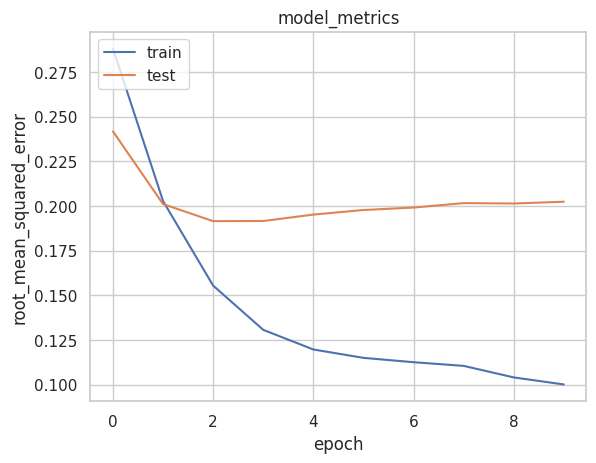

In [106]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model dievaluasi menggunakan metrik Root Mean Squared Error (RMSE), yang mengukur jarak rata-rata kuadrat antara nilai rating prediksi dan aktual. RMSE dipilih karena sesuai untuk data rating eksplisit. Berdasarkan grafik learning curve, RMSE pada data training terus menurun hingga sekitar 0.100, sedangkan pada data testing stabil di angka sekitar 0.20. Model menunjukkan pembelajaran yang baik dengan early stopping yang efektif di sekitar epoch 8-10. Implementasi regularisasi dan early stopping berhasil mengurangi overfitting, menghasilkan model yang lebih seimbang antara akurasi training dan kemampuan generalisasi.
